In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-drop-out-prediction/train.csv
/kaggle/input/students-drop-out-prediction/test.csv


## Data

In [2]:
data=pd.read_csv('/kaggle/input/students-drop-out-prediction/train.csv')
data.head()

,id,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,...,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40,label
0,0,3,6,11,55,1,1,16,5,60,...,-0.3,0.79,1,93,47,1,48,26,0,1
1,1,8,94,12,65,1,4,22,4,173,...,5.4,6.51,6,29,37,25,53,35,7,2
2,2,3,166,10,155,1,1,16,1,309,...,0.6,2.02,1,8,34,4,43,38,2,1
3,3,3,6,13,121,1,1,16,1,6,...,0.6,2.02,7,37,40,27,43,65,0,1
4,4,4,51,18,21,1,17,22,118,168,...,8.4,12.51,16,22,25,25,24,23,1,1


In [3]:
data.isnull().sum()
print(data.shape)

(3796, 43)


In [4]:
X_t=data.drop(['label'], axis=1)
y_t=data['label']
print(X_t.head())
print(y_t.head())

   id  v_21  v_32  v_15  v_4  v_1  v_8  v_12  v_25  v_20  ...   v_7  v_2  \
0   0     3     6    11   55    1    1    16     5    60  ...  13.9 -0.3   
1   1     8    94    12   65    1    4    22     4   173  ...  14.9  5.4   
2   2     3   166    10  155    1    1    16     1   309  ...  11.1  0.6   
3   3     3     6    13  121    1    1    16     1     6  ...  11.1  0.6   
4   4     4    51    18   21    1   17    22   118   168  ...  10.9  8.4   

    v_16  v_34  v_35  v_36  v_37  v_38  v_39  v_40  
0   0.79     1    93    47     1    48    26     0  
1   6.51     6    29    37    25    53    35     7  
2   2.02     1     8    34     4    43    38     2  
3   2.02     7    37    40    27    43    65     0  
4  12.51    16    22    25    25    24    23     1  

[5 rows x 42 columns]
0    1
1    2
2    1
3    1
4    1
Name: label, dtype: int64


## Imports

In [5]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler

from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.metrics import precision_score, recall_score, classification_report 
from sklearn.metrics import precision_recall_curve ,make_scorer ,f1_score
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression #Base Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier #-------------------Selected Model for Submission
from xgboost import XGBClassifier

## Splitting the Data

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X_t,y_t, test_size=0.2,random_state=1980)

## Data Preprocessing

In [7]:
scaler=StandardScaler()
x_train_1=scaler.fit_transform(x_train)
x_test_1=scaler.fit_transform(x_test)

## Base Model
### Logistic Regression

In [8]:
lr=LogisticRegression()
lr.fit(x_train_1,y_train)
print("Training Score",lr.score(x_train_1,y_train))
print("Test Score",lr.score(x_test_1,y_test))

Training Score 0.7361660079051383
Test Score 0.7644736842105263


### KNN Model
#### with cross validation

In [9]:
np.random.seed(42)
k=GridSearchCV(KNeighborsClassifier(algorithm='auto'),{'n_neighbors':[2,4,5],'weights':['uniform','distance'],'metric':['euclidean', 'manhattan']},cv=5)
k.fit(x_train_1,y_train)
print("Training Score",k.score(x_train_1,y_train))
print("Test Score",k.score(x_test_1,y_test))

Training Score 0.7549407114624506
Test Score 0.6828947368421052


### SVM Model

In [10]:
sm=SVC(C=35)
sm.fit(x_train_1,y_train)
print("Training Score",sm.score(x_train_1,y_train))
print("Test Score",sm.score(x_test_1,y_test))

Training Score 0.994729907773386
Test Score 0.7263157894736842


### Decision Tree Classifier
#### with Cross Validation

In [11]:
DT=GridSearchCV(DecisionTreeClassifier(),{'splitter':['best','random'],'criterion':['gini','entropy']},cv=10)
DT.fit(x_train_1,y_train)
DT.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [12]:
DT.score(x_train_1,y_train)
DT.score(x_test_1,y_test)

0.6355263157894737

### XgBoost Classifier

Training Score 1.0
Test Score 0.7828947368421053


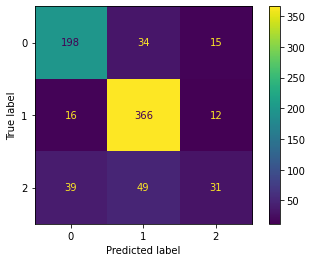

In [13]:
XG =XGBClassifier()
XG.fit(x_train_1, y_train)
print("Training Score",XG.score(x_train_1,y_train))
print("Test Score",XG.score(x_test_1,y_test))


y_hat_XG=XG.predict(x_test_1)
ConfusionMatrixDisplay.from_predictions(y_test, y_hat_XG)
plt.show()

In [14]:
print(classification_report(y_test,y_hat_XG))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       247
           1       0.82      0.93      0.87       394
           2       0.53      0.26      0.35       119

    accuracy                           0.78       760
   macro avg       0.71      0.66      0.67       760
weighted avg       0.76      0.78      0.76       760



### Hyperparameter Tuning of RandomForestClassifier
### With Cross Validation

In [15]:
np.random.seed(42)
'''rfc=GridSearchCV(RandomForestClassifier(),{'n_estimators':[5,10,20],'max_features':['auto','sqrt'],
                                           'max_depth':[2,4,6,8],'min_samples_split':[2,3,5],
                                           'min_samples_leaf':[1,2],'bootstrap':[True,False]},cv=10)'''


rfc=GridSearchCV(RandomForestClassifier(),{'n_estimators':[10,20,50],'max_features':['auto','sqrt'],
                                           'max_depth':[2,4],'min_samples_split':[2,5],'min_samples_leaf':[1,2],
                                           'bootstrap':[True,False]},cv=10)


rfc.fit(x_train_1, y_train)
print("Training Score",rfc.score(x_train_1,y_train))
print("Test Score",rfc.score(x_test_1,y_test))

Training Score 0.7061923583662714
Test Score 0.7394736842105263


In [16]:
print(rfc.best_params_)
print(rfc.best_score_)

{'bootstrap': False, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
0.7045488101441724


### AdaBoost Classifier
#### Selected Model for Submission

In [17]:
ada=AdaBoostClassifier(base_estimator=RandomForestClassifier())
ada.fit(x_train_1,y_train)
y_hat=ada.predict(x_test_1)
print("Training Score",ada.score(x_train_1,y_train))
print("Test Score",ada.score(x_test_1,y_test))

Training Score 1.0
Test Score 0.7710526315789473


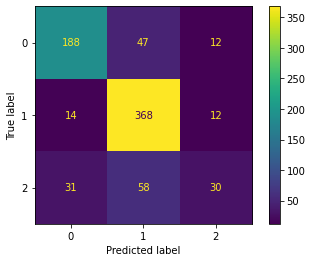

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, y_hat)
plt.show()

In [19]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       247
           1       0.78      0.93      0.85       394
           2       0.56      0.25      0.35       119

    accuracy                           0.77       760
   macro avg       0.71      0.65      0.66       760
weighted avg       0.75      0.77      0.75       760



## Test Data

In [20]:
test_data=pd.read_csv('../input/students-drop-out-prediction/test.csv')
X_Test=scaler.fit_transform(test_data)


y_hat_final=ada.predict(X_Test)
final=pd.DataFrame({"id":test_data.id,"label":y_hat_final})
final.to_csv("submission.csv",index=False)
